In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

# Importing all the required python modules

In [2]:
df=pd.read_csv("C:\\Users\\Anisha Siwas\\Downloads\\archive (3)\\heart.csv")

In [3]:
# Head function will show us the top records of the dataset. By default python shows the top 5 records.
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Tail function will show you the last 5 records of the dataset.
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# It returns the column labels of the given dataframe.
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
# Identifying the datatype for every Variable
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
# Using df.info() to check if any null value present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Describe is used to view some basic statistical details like, percentile, mean, standard deviation, etc of the given dataframe.
df.describe(include = "all")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# We will check for any duplicate records in the data. We will remove this data from the data set so that we get only distinct records.
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [10]:
#Removing the duplicates
df = df.drop_duplicates(subset = None, keep ='first')

In [11]:
# Dropping the rows with null values
df.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [12]:
# Correlation Matrix to check if any two collumn are correlated and can be removed.
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [13]:
# Defining numerical and categorical variables
num_atr=['age', 'trestbps' , 'chol', 'thalach', 'oldpeak']

cat_atr=['sex' , 'cp' , 'fbs' , 'restecg' , 'exang', 'slope', 'ca', 'thal' ]

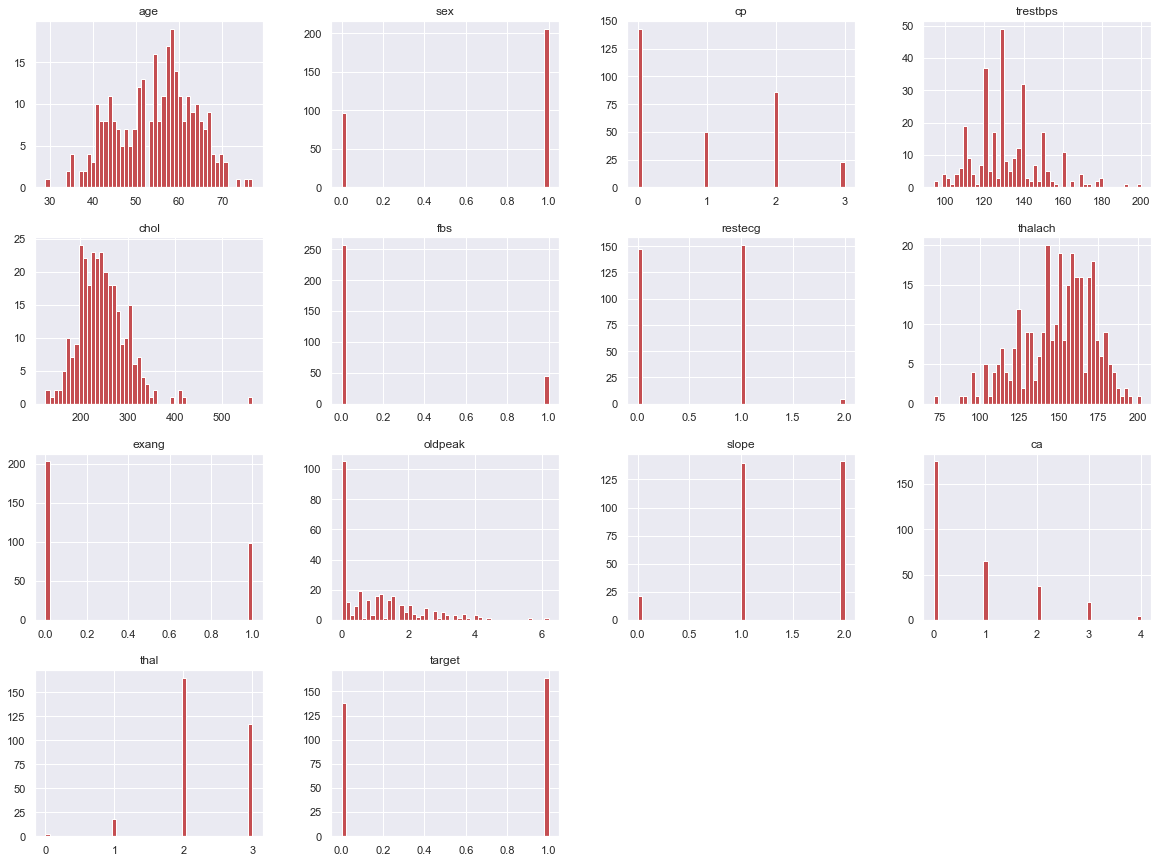

In [14]:
# checking distribution for all the variables in the data by plotting Histograms for all the variable
df.hist(bins=50, figsize=(20,15), color='r')
plt.show()

<AxesSubplot:>

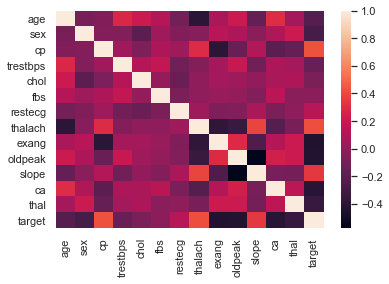

In [15]:
df_corr=df.corr()
sns.heatmap(df_corr)

# KNN Classification Algorithm

In [16]:
# Dividing the dataset into independent variables and target variables
X= df.drop(['target'], axis=1)
y= df['target']

In [17]:
# Dividing the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
# Using StandardScaler for normal distribution of numerical data
from sklearn.preprocessing import StandardScaler
stds = StandardScaler()
stds.fit_transform(X_train[num_atr])

array([[-0.97331169, -1.5466384 , -0.73560915, -0.0954598 ,  1.69714085],
       [ 0.64410332,  1.11278151, -0.03937497,  0.90899374, -0.09876338],
       [-0.54200102,  0.18776589,  0.63510189,  0.5159467 , -0.86843662],
       ...,
       [-2.69855437, -0.04348801, -0.82263842,  2.26282242, -0.86843662],
       [ 0.42844799, -0.33255539,  1.26606412,  0.90899374, -0.86843662],
       [-0.00286268,  1.11278151, -0.21343351,  0.64696238,  0.49987136]])

In [19]:
a1 = X_train[cat_atr]
b1 = stds.transform(X_train[num_atr])

x_train = np.hstack([a1,b1])

In [20]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [21]:
# As testing dataset also contain categorical values it also needs to be converted into numerical values to apply KNN classifier
# Using LabelEncoder to convert categorical values of testing into numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)
X_test[cat_atr].head()

C:\Pyhton\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,sex,cp,fbs,restecg,exang,slope,ca,thal
174,1,0,0,0,1,1,2,2
88,0,2,0,1,0,1,0,1
163,1,2,0,1,0,2,4,1
243,1,0,0,1,1,1,1,2
110,0,0,0,1,1,2,0,1


In [22]:
# Using StandardScaler for normal distribution of numerical data in testing data
stds.fit_transform(X_test[num_atr])

array([[ 0.53997783, -0.22971562, -0.85384966, -0.69416911,  1.13242129],
       [-0.19503677, -1.34171482, -0.72839277,  0.45271899,  0.42188244],
       [-2.1550757 ,  0.21508406, -1.33999509,  1.1143852 , -0.99919525],
       [ 0.17247053,  0.9934835 ,  0.21253387, -2.63505667,  0.06661302],
       [ 1.02998756,  2.55028238,  1.01232151,  0.27627466, -0.99919525],
       [-1.66506596, -0.78571522,  0.54185819,  0.62916331, -0.99919525],
       [ 0.53997783,  0.60428378,  0.33799075, -0.25305831,  1.48769071],
       [-2.03257326,  0.21508406, -0.63430011,  0.1880525 , -0.99919525],
       [ 0.29497296,  0.10388414,  0.91822885,  0.1880525 , -0.99919525],
       [-0.3175392 , -0.22971562, -0.99498865,  0.1880525 ,  0.06661302],
       [ 0.4174754 ,  1.99428278,  0.43208342,  0.49683007, -0.82156054],
       [ 1.27499243, -0.78571522,  0.65163297,  0.14394142, -0.64392583],
       [ 1.02998756, -0.50771542,  0.76140774, -0.73828019,  0.59951715],
       [ 0.17247053, -0.34091554,  0.6

In [23]:
a2 = X_test[cat_atr]
b2 = stds.transform(X_test[num_atr])

x_test = np.hstack([a2,b2])

In [24]:
# predicting the values now using testing data
y_pred = knn.predict(x_test)

In [25]:
#Checking the predicted values
y_pred

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

# Performance measures for KNN Classifier Algorithm

In [26]:
#Using confussion matrix to compare predicted values of target varable with testing values of target variable
confusion_matrix(y_test, y_pred)

array([[22, 14],
       [ 2, 38]], dtype=int64)

In [27]:
# Checking the accuracy of algorithm
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# Getting 78.9% accuracy

0.7894736842105263

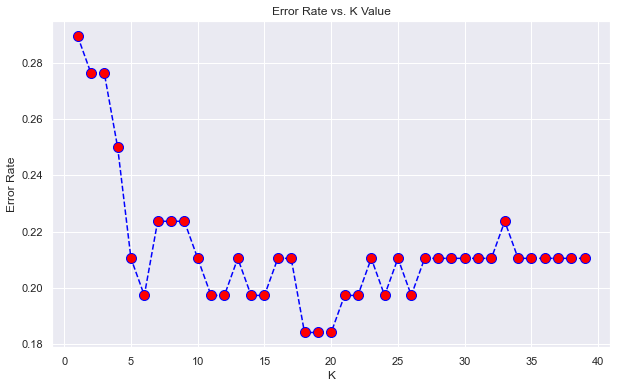

Minimum error:- 0.1842105263157895 at K = 18


In [28]:
# Plotting graph for 'Error Rate vs. K Value' to check most accurate K value
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [29]:
knn = KNeighborsClassifier(n_neighbors=18, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=18)

In [30]:
y_pred = knn.predict(x_test)

In [31]:
# Checking the accuracy of algorithm
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# Accuracy improved from 78.9% to 81.5%

0.8157894736842105

# Decision Tree Classification

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [33]:
X= df.drop(['target'], axis=1)
y= df['target']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [34]:
y.shape

(302,)

In [35]:
X.shape

(302, 13)

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

C:\Pyhton\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [38]:
X_train[cat_atr].head()

,sex,cp,fbs,restecg,exang,slope,ca,thal
146,0,2,0,1,0,1,1,2
202,1,0,0,0,1,2,0,3
292,0,0,1,0,1,1,2,1
276,1,0,0,1,0,1,1,3
19,0,3,0,1,0,2,2,2


In [39]:
ss = StandardScaler()
ss.fit_transform(X_train[num_atr])

array([[-1.06167727, -0.7213128 , -0.00545977, -0.05360584, -0.62827225],
       [ 0.43317242,  1.1207084 ,  0.60315022, -1.71311019, -0.19842321],
       [ 0.43317242,  2.27197164, -0.37497298, -0.18461934,  1.52097296],
       ...,
       [-2.66330193, -0.03055485, -0.83143048,  2.26096602, -0.88618167],
       [ 0.43317242, -0.31837067,  1.25523236,  0.90715984, -0.88618167],
       [ 0.00607251,  1.1207084 , -0.22282048,  0.64513283,  0.48933526]])

In [40]:
a = X_train[cat_atr]
b = ss.transform(X_train[num_atr])

Xtr = np.hstack([a,b])
Xtr.shape 

(211, 13)

In [41]:
ss = StandardScaler()
ss.fit_transform(X_test[num_atr])
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)
a1 = X_test[cat_atr]
b1 = ss.transform(X_test[num_atr])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape 

array([[ 5.51971101e-01, -2.31533197e-01, -8.15441790e-01,
        -7.06282063e-01,  1.15480839e+00],
       [-1.88511015e-01, -1.36430314e+00, -6.85882292e-01,
         4.38281883e-01,  4.59439895e-01],
       [-2.16312999e+00,  2.21574780e-01, -1.31748485e+00,
         1.09860724e+00, -9.31297085e-01],
       [ 1.81730043e-01,  1.01451374e+00,  2.85813949e-01,
        -2.64323643e+00,  1.11755650e-01],
       [ 1.04562584e+00,  2.60039166e+00,  1.11175575e+00,
         2.62195122e-01, -9.31297085e-01],
       [-1.66947525e+00, -7.97918167e-01,  6.25907634e-01,
         6.14368644e-01, -9.31297085e-01],
       [ 5.51971101e-01,  6.18044259e-01,  4.15373448e-01,
        -2.66065161e-01,  1.50249263e+00],
       [-2.03971630e+00,  2.21574780e-01, -5.88712668e-01,
         1.74151742e-01, -9.31297085e-01],
       [ 3.05143729e-01,  1.08297786e-01,  1.01458613e+00,
         1.74151742e-01, -9.31297085e-01],
       [-3.11924701e-01, -2.31533197e-01, -9.61196227e-01,
         1.74151742e-01

C:\Pyhton\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(91, 13)

In [42]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=None)

In [43]:
dt.fit(Xtr,y_train)

DecisionTreeClassifier()

In [44]:
y_pred = dt.predict(Xtr1)

In [45]:
np.sum((y_test == y_pred))/y_test.size

0.7582417582417582

In [46]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [47]:
df['target'].unique()

array([1, 0], dtype=int64)

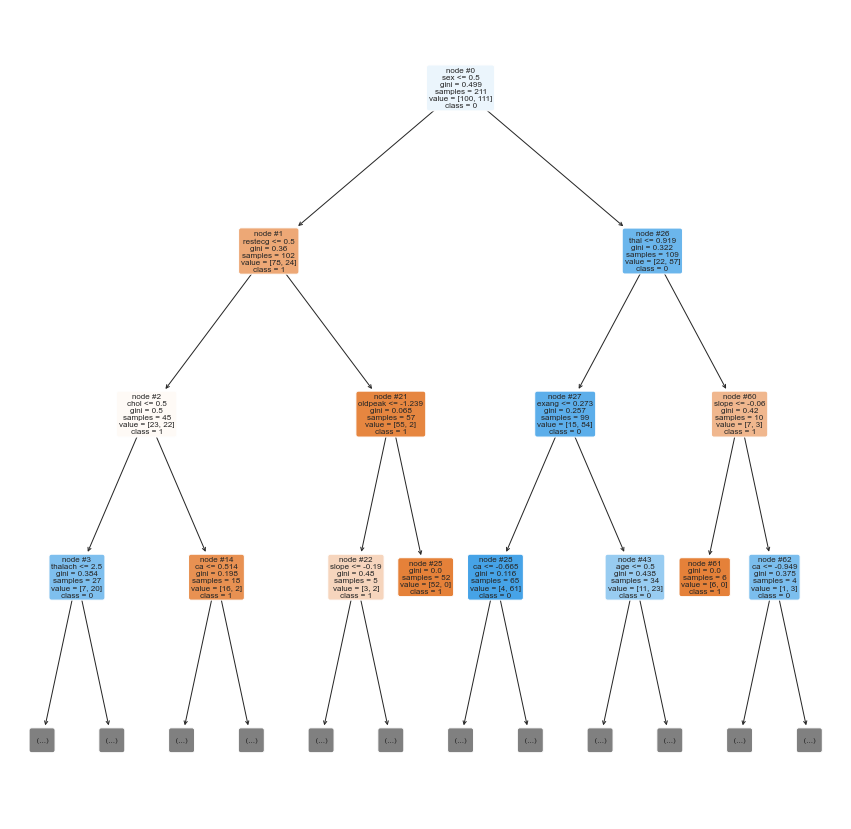

In [48]:
_=plt.figure(figsize=(15,15))
_=plot_tree(
            dt,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
            class_names = ['1','0']
            )

_=plt.show()

In [49]:
score = accuracy_score(y_test, y_pred)
print(score)

0.7582417582417582


Accuracy as per Decision Tree Algorithm is 76.9%


# Random Forest Classification

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>, <AxesSubplot:>]],
      dtype=object)

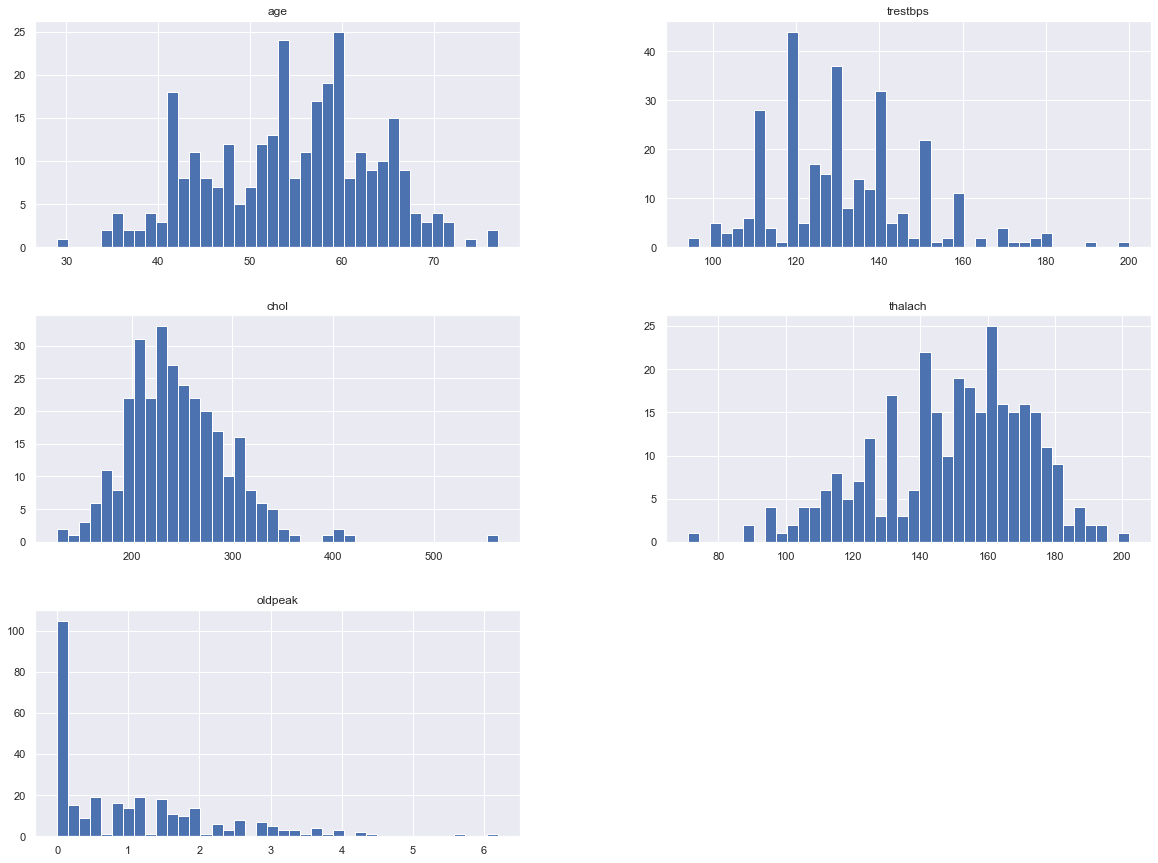

In [50]:
df[num_atr].hist(bins=40, figsize=(20,15)) 
plt.show()
# Histogram of all the numerical attributes

In [51]:
X= df.drop(['target'], axis=1)
y= df['target']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.preprocessing import OneHotEncoder as onehot

In [53]:
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

C:\Pyhton\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [54]:
X_train[cat_atr].head()

,sex,cp,fbs,restecg,exang,slope,ca,thal
146,0,2,0,1,0,1,1,2
202,1,0,0,0,1,2,0,3
292,0,0,1,0,1,1,2,1
276,1,0,0,1,0,1,1,3
19,0,3,0,1,0,2,2,2


In [55]:
ss = StandardScaler()
ss.fit_transform(X_train[num_atr])

array([[-1.06167727, -0.7213128 , -0.00545977, -0.05360584, -0.62827225],
       [ 0.43317242,  1.1207084 ,  0.60315022, -1.71311019, -0.19842321],
       [ 0.43317242,  2.27197164, -0.37497298, -0.18461934,  1.52097296],
       ...,
       [-2.66330193, -0.03055485, -0.83143048,  2.26096602, -0.88618167],
       [ 0.43317242, -0.31837067,  1.25523236,  0.90715984, -0.88618167],
       [ 0.00607251,  1.1207084 , -0.22282048,  0.64513283,  0.48933526]])

In [56]:
a = X_train[cat_atr]
b = ss.transform(X_train[num_atr])

Xtr = np.hstack([a,b])
Xtr.shape 

(211, 13)

In [57]:
ss = StandardScaler()
ss.fit_transform(X_test[num_atr])
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)
a1 = X_test[cat_atr]
b1 = ss.transform(X_test[num_atr])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape 

array([[ 5.51971101e-01, -2.31533197e-01, -8.15441790e-01,
        -7.06282063e-01,  1.15480839e+00],
       [-1.88511015e-01, -1.36430314e+00, -6.85882292e-01,
         4.38281883e-01,  4.59439895e-01],
       [-2.16312999e+00,  2.21574780e-01, -1.31748485e+00,
         1.09860724e+00, -9.31297085e-01],
       [ 1.81730043e-01,  1.01451374e+00,  2.85813949e-01,
        -2.64323643e+00,  1.11755650e-01],
       [ 1.04562584e+00,  2.60039166e+00,  1.11175575e+00,
         2.62195122e-01, -9.31297085e-01],
       [-1.66947525e+00, -7.97918167e-01,  6.25907634e-01,
         6.14368644e-01, -9.31297085e-01],
       [ 5.51971101e-01,  6.18044259e-01,  4.15373448e-01,
        -2.66065161e-01,  1.50249263e+00],
       [-2.03971630e+00,  2.21574780e-01, -5.88712668e-01,
         1.74151742e-01, -9.31297085e-01],
       [ 3.05143729e-01,  1.08297786e-01,  1.01458613e+00,
         1.74151742e-01, -9.31297085e-01],
       [-3.11924701e-01, -2.31533197e-01, -9.61196227e-01,
         1.74151742e-01

C:\Pyhton\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(91, 13)

In [58]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtr,y_train)
y_pred=clf.predict(Xtr1)

RandomForestClassifier()

In [59]:
from sklearn import metrics
print( "Accuracy" , metrics.accuracy_score(y_test, y_pred))

Accuracy 0.7692307692307693


In [60]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(y_test, y_pred)

array([[29,  9],
       [12, 41]], dtype=int64)

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        38
           1       0.82      0.77      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



In [62]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [63]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [64]:
df.feature_names = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']]
df.target_names = df['target']

<ipython-input-64-a39ccb19f25a>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.feature_names = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
<ipython-input-64-a39ccb19f25a>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.target_names = df['target']


In [65]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feature_imp

2     0.181219
7     0.133319
11    0.108963
9     0.098472
12    0.092626
0     0.080091
4     0.073546
3     0.065779
8     0.064383
10    0.046180
1     0.029980
6     0.017021
5     0.008422
dtype: float64

In [66]:
list(zip(df.columns, feature_imp))

[('age', 0.1812185357649668),
 ('sex', 0.1333185025460675),
 ('cp', 0.10896294784292922),
 ('trestbps', 0.09847229745754284),
 ('chol', 0.09262573235367305),
 ('fbs', 0.08009122089210108),
 ('restecg', 0.07354581654576026),
 ('thalach', 0.06577933858332147),
 ('exang', 0.06438322953551943),
 ('oldpeak', 0.04617994561879433),
 ('slope', 0.02997965619237248),
 ('ca', 0.01702108909711523),
 ('thal', 0.00842168756983628)]

<AxesSubplot:>

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features')

No handles with labels found to put in legend.


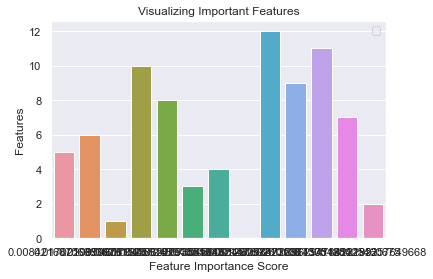

In [67]:
#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [68]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtr,y_train)
y_pred=clf.predict(Xtr1)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

RandomForestClassifier()

Accuracy: 0.7582417582417582


In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72        38
           1       0.82      0.75      0.78        53

    accuracy                           0.76        91
   macro avg       0.75      0.76      0.75        91
weighted avg       0.76      0.76      0.76        91



# Final Conclusion

Accuracy as oer all the three algorithms:

KNN Classification Algorithm - Accuracy improved from 78.9% to 81.5%

Decision Tree Algorithm - 76.92%

Random Forest Classification - 75.82%

Therefore KNN Classification Algorithm is best for this dataset.

# PCA

In [70]:
from sklearn.decomposition import PCA
model=PCA(n_components=2)

#It finds the 2 principle componenets.
model.fit(X)
#reducing 30 features to 2
#Transforms the data into 2 principle components
X_PCA=model.transform(X)
X.shape,X_PCA.shape

PCA(n_components=2)

((302, 13), (302, 2))

In [71]:
X_Train, X_Test, y_Train, y_Test = train_test_split(X_PCA, y, random_state=1)

KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=9)

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Error Rate vs. K Value')

Text(0.5, 0, 'K')

Text(0, 0.5, 'Error Rate')

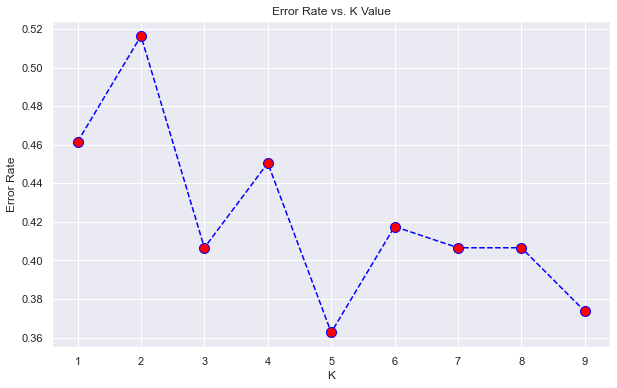

Minimum error:- 0.3626373626373627 at K = 5


In [72]:
error_rate = []
for i in range(1,10):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [73]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [74]:
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.6373626373626373

In [75]:
from sklearn.tree import DecisionTreeClassifier
df = DecisionTreeClassifier(max_depth=10,random_state=42)
df.fit(X_train,y_train)
y_pred = df.predict(X_test)
print(accuracy_score(y_test,y_pred))

DecisionTreeClassifier(max_depth=10, random_state=42)

0.7362637362637363


In [76]:
rf = RandomForestClassifier(max_depth=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test,y_pred))

RandomForestClassifier(max_depth=10)

0.7692307692307693


 PCA (choosing the optimal number of components)

In [77]:
from sklearn.decomposition import PCA
model1=PCA(n_components=3)

#It finds the 2 principle componenets.
model1.fit(X)
#reducing 30 features to 2
#Transforms the data into 2 principle components
X_PCA=model1.transform(X)
X.shape,X_PCA.shape

PCA(n_components=3)

((302, 13), (302, 3))

In [78]:
model1.explained_variance_ratio_

array([0.74693348, 0.15067252, 0.08495227])

Text(0.5, 1.0, 'Scree Plot')

Text(0.5, 0, 'Principal Component')

Text(0, 0.5, 'Variance Explained')

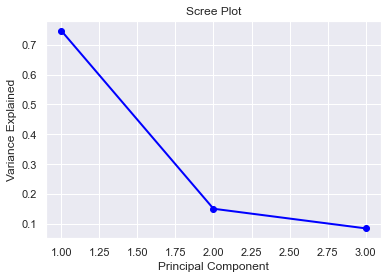

In [79]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(model1.n_components_) + 1
plt.plot(PC_values, model1.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()